<a href="https://colab.research.google.com/github/KFerreira1221/MachineLearning/blob/main/SpaceshipProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceshipset/sample_submission.csv
/kaggle/input/spaceshipset/train.csv
/kaggle/input/spaceshipset/test.csv


In [ ]:
# Import libraries and load the datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings("ignore")

train = pd.read_csv('/kaggle/input/spaceshipset/train.csv')
test = pd.read_csv('/kaggle/input/spaceshipset/test.csv')

print(train.head())
print(test.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  
  

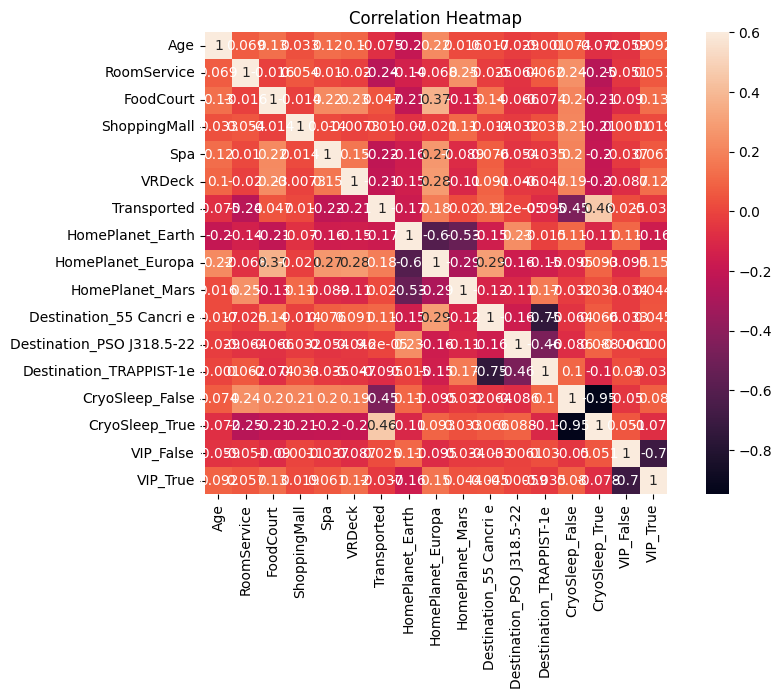

In [ ]:
# Create a correlation heatmap
train_encoded = pd.get_dummies(train, columns=['HomePlanet', 'Destination', 'CryoSleep', 'VIP'])
numeric_df = train_encoded.drop(columns=['PassengerId', 'Cabin', 'Name'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), vmax=0.6, square=True, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Fill in the Null values of the HomePlanet column with the most common letter and one-hot code the column
train_test_data = [train, test]
train.HomePlanet.value_counts()
for dataset in train_test_data:
    dataset['HomePlanet'] = dataset['HomePlanet'].fillna('Earth')
for dataset in train_test_data:
    dataset['HomePlanet'] = dataset['HomePlanet'].map( {'Earth': 0, 'Europa': 1, 'Mars': 2} ).astype(int)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train_test_data = [train, test]
train.Destination.value_counts()
for dataset in train_test_data:
    dataset['Destination'] = dataset['Destination'].fillna('TRAPPIST-1e')
destination_mapping = {'TRAPPIST-1e': 0, '55 Cancri e': 1, 'PSO J318.5-22': 2}
for dataset in train_test_data:
    dataset['Destination'] = dataset['Destination'].map(destination_mapping).astype(int)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,False,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,False,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,False,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,False,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,False,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# Fill in the Null values of the CryoSleep column with the most common value and one-hot code the column
train_test_data = [train, test]
train.CryoSleep.value_counts()
for dataset in train_test_data:
    dataset['CryoSleep'] = dataset['CryoSleep'].fillna(False)
cryo_sleep_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['CryoSleep'] = dataset['CryoSleep'].map(cryo_sleep_mapping).astype(int)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,0,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0,F/0/S,0,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0,A/0/S,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0,A/0/S,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0,F/1/S,0,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# Fill in the Null values of the VIP column with the most common value and one-hot code the column
train_test_data = [train, test]
train.VIP.value_counts()
for dataset in train_test_data:
    dataset['VIP'] = dataset['VIP'].fillna(False)
cryo_sleep_mapping = {False: 0, True: 1}
for dataset in train_test_data:
    dataset['VIP'] = dataset['VIP'].map(cryo_sleep_mapping).astype(int)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,1,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,0,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,1,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,1,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,0,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
# Fill in the Null values of the Age column with the median value and create a new column called AgeGroup that divides ages into groups
median_age = train['Age'].median()
train['Age'].fillna(median_age, inplace=True)
age_bins = [0, 12, 18, 25, 35, 45, 55, 65, 75, 85, 95]
age_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
train['AgeGroup'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels, right=False)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup
0,0001_01,1,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,5
1,0002_01,0,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,3
2,0003_01,1,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,7
3,0003_02,1,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,4
4,0004_01,0,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,2


In [ ]:
# Create columns AmenityUsage and UsedAmenities
train['AmenityUsage'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']
train['UsedAmenities'] = (train['AmenityUsage'] > 0).astype(int)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup,AmenityUsage,UsedAmenities
0,0001_01,1,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,5,0.0,0
1,0002_01,0,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,3,736.0,1
2,0003_01,1,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,7,10383.0,1
3,0003_02,1,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,4,5176.0,1
4,0004_01,0,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,2,1091.0,1


In [ ]:
# Create columns Deck and Side
def extract_cabin_features(df):
    df['Deck'] = df['Cabin'].str[0]
    df['Side'] = df['Cabin'].str[-1]
    return df
train = extract_cabin_features(train)
test = extract_cabin_features(test)
imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
train[['Deck', 'Side']] = imputer.fit_transform(train[['Deck', 'Side']])
test[['Deck', 'Side']] = imputer.transform(test[['Deck', 'Side']])
combined_deck = pd.concat([train['Deck'], test['Deck']])
combined_side = pd.concat([train['Side'], test['Side']])
encoder_deck = LabelEncoder()
encoder_side = LabelEncoder()
encoder_deck.fit(combined_deck)
encoder_side.fit(combined_side)
train['Deck'] = encoder_deck.transform(train['Deck'])
train['Side'] = encoder_side.transform(train['Side'])
test['Deck'] = encoder_deck.transform(test['Deck'])
test['Side'] = encoder_side.transform(test['Side'])
print(train[['Cabin', 'Deck', 'Side']].head())
train.head()

   Cabin  Deck  Side
0  B/0/P     1     0
1  F/0/S     5     1
2  A/0/S     0     1
3  A/0/S     0     1
4  F/1/S     5     1


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeGroup,AmenityUsage,UsedAmenities,Deck,Side
0,0001_01,1,0,B/0/P,0,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,5,0.0,0,1,0
1,0002_01,0,0,F/0/S,0,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,3,736.0,1,5,1
2,0003_01,1,0,A/0/S,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,7,10383.0,1,0,1
3,0003_02,1,0,A/0/S,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,4,5176.0,1,0,1
4,0004_01,0,0,F/1/S,0,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,2,1091.0,1,5,1


In [ ]:
# Calculate the survival correlations of the variables
col=['HomePlanet','CryoSleep','Destination','VIP', 'AgeGroup', 'UsedAmenities', 'Deck', 'Side']
for i in col:
    print('Survival Correlation by:', i)
    train_cor=train.groupby(i)['Transported'].mean().reset_index()
    print(train_cor)
    print('-'*10, '\n')

Survival Correlation by: HomePlanet
   HomePlanet  Transported
0           0     0.427649
1           1     0.658846
2           2     0.523024
---------- 

Survival Correlation by: CryoSleep
   CryoSleep  Transported
0          0     0.335042
1          1     0.817583
---------- 

Survival Correlation by: Destination
   Destination  Transported
0            0     0.472199
1            1     0.610000
2            2     0.503769
---------- 

Survival Correlation by: VIP
   VIP  Transported
0    0     0.506475
1    1     0.381910
---------- 

Survival Correlation by: AgeGroup
  AgeGroup  Transported
0        1     0.699346
1        2     0.561538
2        3     0.455408
3        4     0.482173
4        5     0.488227
5        6     0.482480
6        7     0.508951
7        8     0.451613
8        9     0.357143
9       10          NaN
---------- 

Survival Correlation by: UsedAmenities
   UsedAmenities  Transported
0              0     0.724669
1              1     0.301234
---------- 



In [ ]:
# Drop the columns that will not be used
train = train.drop(['PassengerId', 'Name', 'Cabin', 'AmenityUsage'], axis=1)
test = test.drop(['Name', 'Cabin'], axis=1)
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,AgeGroup,UsedAmenities,Deck,Side
0,1,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,5,0,1,0
1,0,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,3,1,5,1
2,1,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,7,1,0,1
3,1,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,4,1,0,1
4,0,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,2,1,5,1


In [ ]:
# Create the x and y variables
X_train = train.drop('Transported', axis=1)
y_train = train['Transported']
X_test = test.copy()

In [ ]:
# Align and fix any missing columns
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [ ]:
# Fill in any missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [ ]:
# Create a XGB model
model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=4,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.01,
    reg_lambda=0.1,
    objective='binary:logistic',
    random_state=42
)
model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train)],
    eval_metric="logloss",
    early_stopping_rounds=10,
    verbose=False
)
y_pred_xgb1 = model.predict(X_test)
acc_xgb = cross_val_score(model, X_train, y_train, cv=5)

In [ ]:
# Create a XGB model with splitting and values modified
X_train_split, X_valid, y_train_split, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    min_child_weight=1,
    gamma=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.01,
    reg_lambda=0.1,
    objective='binary:logistic',
    random_state=42,
    enable_categorical=True
)

model.fit(
    X_train_split, y_train_split,
    eval_set=[(X_valid, y_valid)],
    eval_metric="logloss",
    early_stopping_rounds=10,
    verbose=False
)
y_pred_xgb2 = model.predict(X_test)
acc_xgb = cross_val_score(model, X_train, y_train, cv=5)

In [ ]:
# Create the submission file
y_pred_series = pd.Series(y_pred_xgb2)
y_pred_bool = y_pred_series.map({0: False, 1: True})
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": y_pred_bool
})
print(submission.head())
submission.to_csv('submission.csv', index=False)

  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True
